In [ ]:
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++#
# PRT820: THE INFLUENCE OF POST-PUBLICATION CORRESPONDENCE ON RESEARCH PAPERS                #
# STUDENT: ANNE TA - S359453                                                                 #
# Code Objective: Explore the dataset to understand the pattern of PPCs and their trends     # 
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++#

In [1]:
#-------------------------------------------------------------
# DEFINE BASIC FUNCTION FOR THE READING DATA FROM FILE
#-------------------------------------------------------------
import pandas as pd
#=======================================
# Define global variables for file path
#=======================================
def get_var(var_name):
    variable_filename = "variable/variable.txt"
    # Read the text file
    with open(variable_filename, 'r') as file:
        lines = file.readlines()

    # Initialize a dictionary to store the variables
    variables = {}

    # Process each line in the file
    for line in lines:
        # Split each line into variable name and value
        parts = line.strip().split(',')
        if len(parts) == 2:
            # Store the variable name and value in the dictionary
            variables[parts[0].strip()] = parts[1].strip()

    return variables[var_name]

#================================================================
# Define a function to read data from a CSV file into a DataFrame
#================================================================
def read_csv(filename, ec='ISO-8859-1'):
    try:
        # Load CSV data into DataFrame
        data_df = pd.read_csv(filename, encoding=ec)
        return data_df
    
    # Handle the case where the file is not found
    except FileNotFoundError:
        print("File not found. Please check the file path.")
        
    # Handle any other exceptions that might occur during reading the CSV file
    except Exception as e:
        print("An error occurred:", e)

In [2]:
#----------------------------------------------------------------------
# STEP O: Read data and select the relevant data for the exploration
#----------------------------------------------------------------------

# Get file path from variable
ppc_analysing_data_yearfilter_filepath =get_var('ppc_analysing_data_yearfilter_filepath')
pca_performance_filepath = get_var('pca_performance_filepath')

# Read data for analysing
ppc_data_all_df = read_csv(ppc_analysing_data_yearfilter_filepath)
ppc_data_all_df.columns

# Select specific data for the exploration
ppc_data_df = ppc_data_all_df[['Journal','Year', 'Article_Age_At_PPC','Agree',
       'Clarification', 'Question', 'Recommendation', 'Disagree', 'Influence']]

In [3]:
#==========================================================================================================
# STEP 1: Data Descrition
#==========================================================================================================
ppc_data_df.describe()

,Year,Article_Age_At_PPC,Agree,Clarification,Question,Recommendation,Disagree,Influence
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2006.056667,0.753333,0.103503,0.223481,0.244668,0.074780,0.353569,0.896667
std,14.489996,0.849447,0.118950,0.131360,0.117845,0.067693,0.196632,0.304902
min,1974.000000,0.000000,0.003097,0.017852,0.044686,0.003997,0.005546,0.000000
25%,2003.000000,0.000000,0.031733,0.125031,0.167598,0.035658,0.193706,1.000000
50%,2011.000000,1.000000,0.064313,0.204900,0.229287,0.058840,0.314770,1.000000
75%,2016.000000,1.000000,0.132739,0.291285,0.297299,0.090970,0.501886,1.000000
max,2023.000000,7.000000,0.839248,0.818861,0.712404,0.609777,0.851162,1.000000


[89.66666666666666, 10.333333333333334]


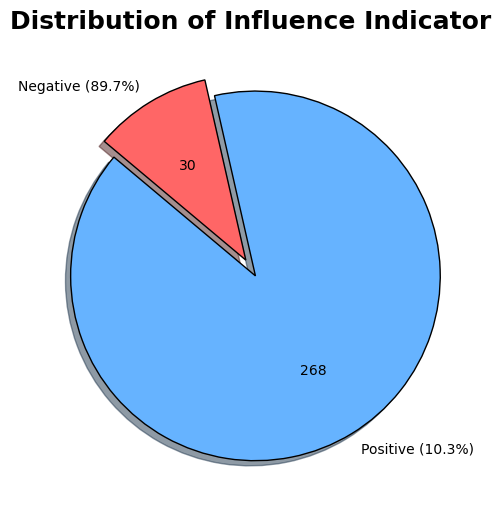

In [4]:
#==========================================================================================================
# Visualize the distribution of PPC Influence in dataset
#==========================================================================================================
import matplotlib.pyplot as plt

# Replicate the data before analysing
ppc_analysing_df = ppc_data_df.copy()

# Count occurrences in the 'Influence_Indicator' column
influenceIndicator_counts = ppc_analysing_df['Influence'].value_counts()

# Calculate the total data
total = sum(influenceIndicator_counts)

# Calculate percentages based on the counts
percentages = [(count / total) * 100 for count in influenceIndicator_counts]
print(percentages)

# Dynamically generate labels including both the label and percentage
labels = [f'Positive ({percentages[1]:.1f}%)',f'Negative ({percentages[0]:.1f}%)']

# Colors for the pie slices
colors = ['#66b3ff', '#ff6666']

# Create the pie chart
plt.figure(figsize=(8, 6))  # Adjusted figure size for better visibility

# Use the pre-calculated percentages for labels
plt.pie(influenceIndicator_counts, labels=labels, colors=colors, 
        autopct=lambda p: f'{int(p * total / 100):,}',  # Display only the actual count
        startangle=140, explode=[0.05] * len(labels), shadow=True, 
        wedgeprops={'edgecolor': 'black'})

# Add a title with enhanced formatting
plt.title("Distribution of Influence Indicator", fontsize=18, fontweight='bold')

# Display the pie chart
plt.show()


In [12]:
#==========================================================================================================
# Encode the PPCs topic to visualise the distribbution of PPC topics in the dataset
#==========================================================================================================

# Replicate the data to calculate the display of of PPC topics in the dataset
ppc_analysing_encode_df = ppc_analysing_df.copy()

# Add new column for PPC type
ppc_analysing_encode_df['PPC_TYPE'] = ppc_analysing_df[['Agree','Clarification','Question','Recommendation','Disagree']].idxmax(axis=1)

# Encode PPC type
# Add encoded columns with initial value 0
ppc_analysing_encode_df['Agree_ENC'] = 0
ppc_analysing_encode_df['Disagree_ENC'] = 0
ppc_analysing_encode_df['Clarification_ENC'] = 0
ppc_analysing_encode_df['Question_ENC'] = 0
ppc_analysing_encode_df['Recommendation_ENC'] = 0

# Set encoded columns based on PPC_TYPE
ppc_analysing_encode_df.loc[ppc_analysing_encode_df['PPC_TYPE'] == 'Agree', 'Agree_ENC'] = 1
ppc_analysing_encode_df.loc[ppc_analysing_encode_df['PPC_TYPE'] == 'Disagree', 'Disagree_ENC'] = 1
ppc_analysing_encode_df.loc[ppc_analysing_encode_df['PPC_TYPE'] == 'Clarification', 'Clarification_ENC'] = 1
ppc_analysing_encode_df.loc[ppc_analysing_encode_df['PPC_TYPE'] == 'Question', 'Question_ENC'] = 1
ppc_analysing_encode_df.loc[ppc_analysing_encode_df['PPC_TYPE'] == 'Recommendation', 'Recommendation_ENC'] = 1


# Select relevant columns by dropping the ones not needed
ppc_analysing_encode_df = ppc_analysing_encode_df.drop(columns = ['Agree', 'Disagree', 'Clarification', 'Question', 'Recommendation'])

# Reordering columns to easy rename
ppc_analysing_encode_df = ppc_analysing_encode_df[['Journal', 'Year', 'Article_Age_At_PPC', 'Influence', 'PPC_TYPE', 'Agree_ENC',
       'Disagree_ENC', 'Clarification_ENC', 'Question_ENC',
       'Recommendation_ENC']]

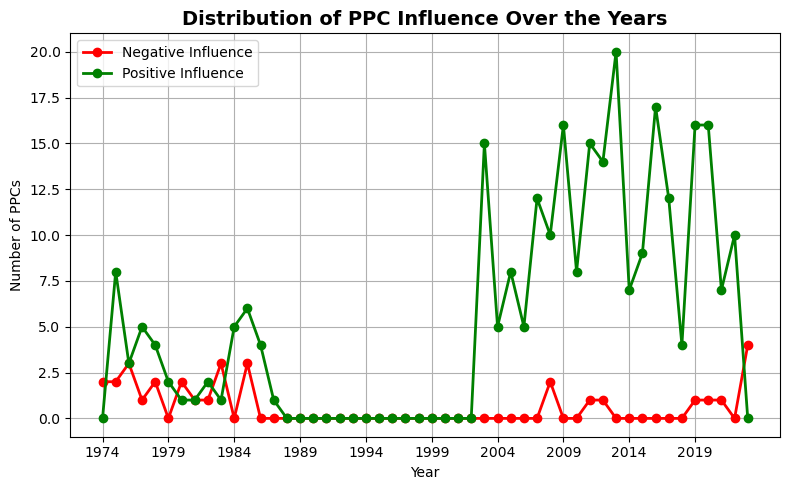

In [16]:
#==========================================================================================================
# Visualize the distribution of Influence Indicator by years
#==========================================================================================================
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Ensure that 'Year' has a full range of years even if some years are missing
full_year_range = np.arange(ppc_analysing_encode_df['Year'].min(), ppc_analysing_encode_df['Year'].max() + 1)

# Grouping by 'Year' and 'Influence' to sum up the values
influence_by_year = ppc_analysing_encode_df.groupby(['Year', 'Influence']).size().unstack(fill_value=0)

# Reindex to include all years, filling missing years with 0
influence_by_year = influence_by_year.reindex(full_year_range, fill_value=0)

# Creating a figure and axis
plt.figure(figsize=(8, 5))

# Plot the two lines directly on the same axis
plt.plot(influence_by_year.index, influence_by_year[0], color='red', marker='o', label='Negative Influence', linewidth=2)
plt.plot(influence_by_year.index, influence_by_year[1], color='green', marker='o', label='Positive Influence', linewidth=2)

# Adding titles and labels
plt.title('Distribution of PPC Influence Over the Years', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of PPCs')

# Set x-ticks to show every 5 years
tick_range = np.arange(ppc_analysing_encode_df['Year'].min(), ppc_analysing_encode_df['Year'].max() + 1, 5)
plt.xticks(tick_range, rotation=0)

# Displaying the grid
plt.grid(True)

# Displaying the legends for the line chart
plt.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

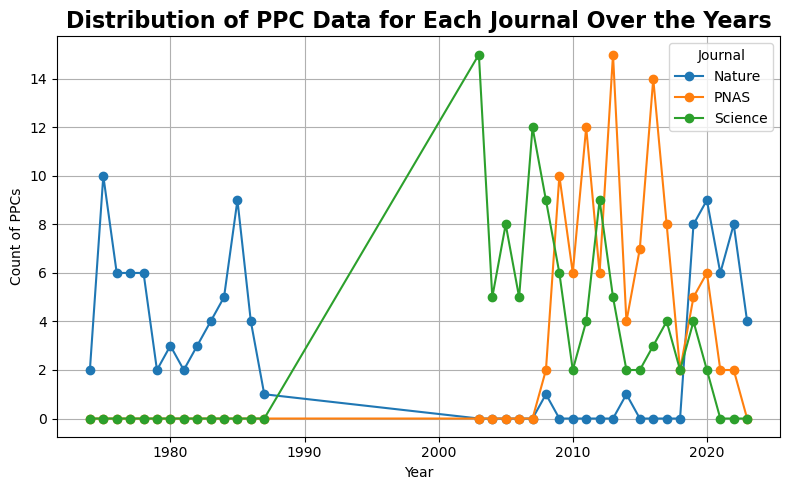

In [19]:
#==========================================================================================================
# Visualize the distribution of PPC over journal by years (Series chart)
#==========================================================================================================
import pandas as pd
import matplotlib.pyplot as plt

# Copy the existing DataFrame
ppc_grouped_df = ppc_analysing_encode_df.copy()

# Group the data by 'Year' and 'Journal' and count the occurrences
ppc_grouped_by_journal = ppc_grouped_df.groupby(['Year', 'Journal']).size().unstack(fill_value=0)

# Step 3: Plot the grouped data in a line chart to show the distribution over the years
plt.figure(figsize=(8, 5))

# Plot each journal's data over the years
for journal in ppc_grouped_by_journal.columns:
    plt.plot(ppc_grouped_by_journal.index, ppc_grouped_by_journal[journal], marker='o', label=journal)

# Adding titles and labels
plt.title('Distribution of PPC Data for Each Journal Over the Years', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Count of PPCs')

# Displaying the grid
plt.grid(True)

# Display the legend
plt.legend(title='Journal')

# Show the plot
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

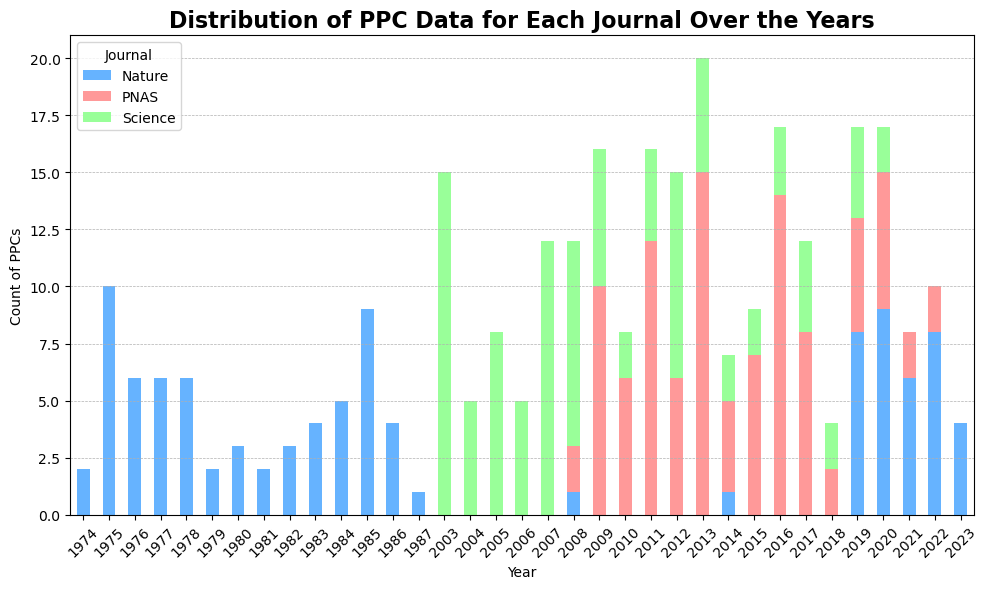

In [20]:
#==========================================================================================================
# Visualize the distribution of PPC over journal by years (Column chart)
#==========================================================================================================
import pandas as pd
import matplotlib.pyplot as plt

# Copy the existing DataFrame
ppc_grouped_df = ppc_analysing_encode_df.copy()

# Step 2: Group the data by 'Year' and 'Journal' and count the occurrences
ppc_grouped_by_journal = ppc_grouped_df.groupby(['Year', 'Journal']).size().unstack(fill_value=0)

# Plot the grouped data in a stacked bar chart to show the distribution over the years
plt.figure(figsize=(10, 6))

# Plotting the stacked column chart
ppc_grouped_by_journal.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#66b3ff', '#ff9999', '#99ff99'])

# Adding titles and labels
plt.title('Distribution of PPC Data for Each Journal Over the Years', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Count of PPCs')

# Displaying the grid for better readability
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

# Display the legend for journals
plt.legend(title='Journal')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


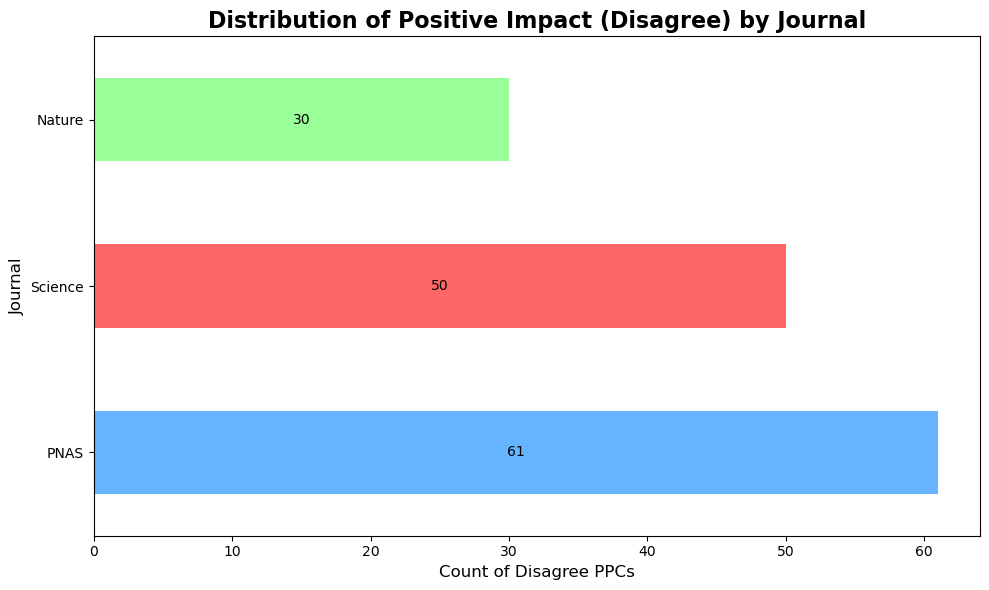

In [30]:
#==========================================================================================================
# Visualise Positive Impact vs. Journal
#==========================================================================================================

# Step 1: Filter the DataFrame for Positive Influence and PPC_TYPE 'Disagree'
ppc_positive_df = ppc_analysing_encode_df[(ppc_analysing_encode_df['Influence'] == 1) & 
                                          (ppc_analysing_encode_df['PPC_TYPE'] == 'Disagree')]

# Step 2: Count occurrences of 'Journal' in the filtered DataFrame
ppc_journal_counts = ppc_positive_df['Journal'].value_counts()

# Define custom colors for the bars (can add more if needed)
colors = ['#66b3ff', '#ff6666', '#99ff99', '#ffcc99', '#c2c2f0']  # Customize as needed

# Plot a horizontal bar chart with custom colors
plt.figure(figsize=(10,6))
ax = ppc_journal_counts.plot(kind='barh', color=colors[:len(ppc_journal_counts)])

# Adding labels to each bar
ax.bar_label(ax.containers[0], label_type='center')

# Adding labels and title
plt.title('Distribution of Positive Impact (Disagree) by Journal', fontsize=16, fontweight='bold')
plt.xlabel('Count of Disagree PPCs', fontsize=12)
plt.ylabel('Journal', fontsize=12)

# Show the chart
plt.tight_layout()
plt.show()

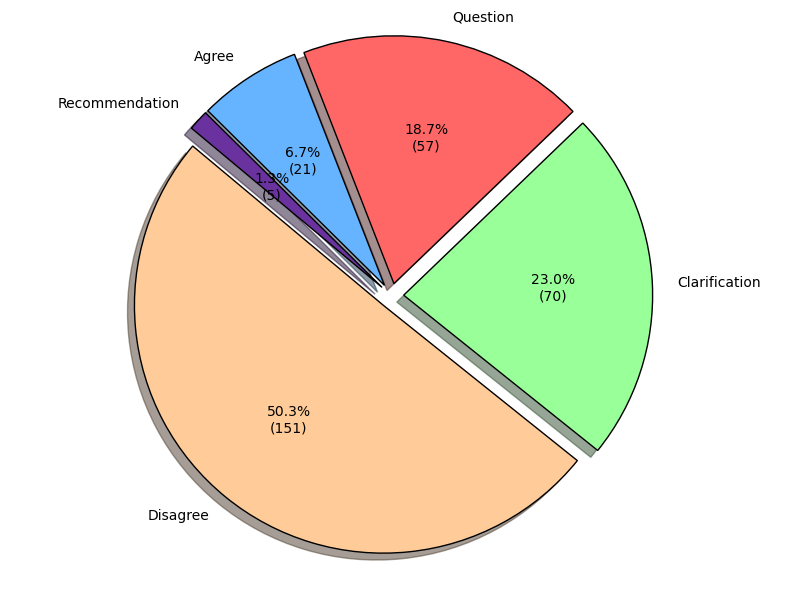

In [31]:
#==========================================================================================================
# Visualise the proportion of PPCs topic in dataset (Pie chart)
#==========================================================================================================
import matplotlib.pyplot as plt

# Step 1: Replicate data for visualizing
filtered_df = ppc_analysing_encode_df

# Step 2: Count occurrences of PPC_TYPE
ppc_type_counts = filtered_df['PPC_TYPE'].value_counts()

# Step 3: Dynamically generate labels based on actual data
labels = ppc_type_counts.index

# Step 4: Colors for the pie slices (dynamically sliced based on number of labels)
colors = ['#ffcc99', '#99ff99', '#ff6666', '#66b3ff', '#6a329f'][:len(labels)]  # Adjust based on number of labels

# [ disagree, clarification, question, agree, recomendat
# Step 5: Create the pie chart with enhancements
plt.figure(figsize=(8, 6))  # Adjusted figure size for better visibility

# Use enhanced formatting for percentages and counts
plt.pie(ppc_type_counts, labels=labels, colors=colors, 
        autopct=lambda p: f'{p:.1f}%\n({int(p * sum(ppc_type_counts) / 100+1):,})',  # Shows percentage and count
        startangle=140, explode=[0.05] * len(labels), shadow=True, 
        wedgeprops={'edgecolor': 'black'})

# Add a title with enhanced formatting
# plt.title("PPC Type with Positive Influence", fontsize=18, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the pie chart
plt.tight_layout()
plt.show()


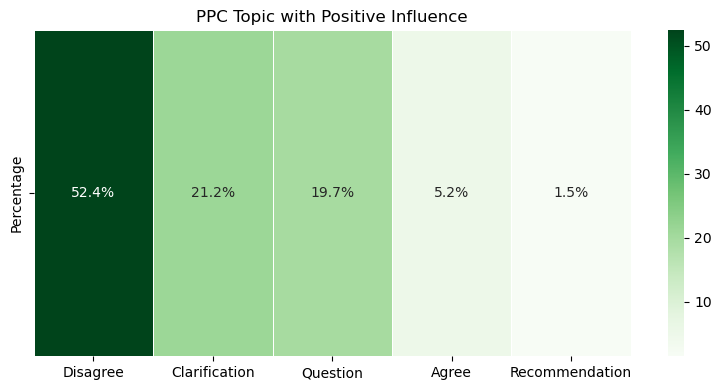

In [33]:
#==========================================================================================================
# Visualise the proportion of PPCs topic which has influence indicator is positive
#==========================================================================================================
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Filter data where Influence = 1
filtered_df = ppc_analysing_encode_df[ppc_analysing_encode_df['Influence'] == 1]

# Step 2: Count occurrences of PPC_TYPE
ppc_type_counts = filtered_df['PPC_TYPE'].value_counts()

# Step 3: Calculate percentage of each PPC_TYPE
ppc_type_percentages = (ppc_type_counts / ppc_type_counts.sum()) * 100

# Step 4: Convert to DataFrame to be used in heatmap
ppc_type_df = pd.DataFrame(ppc_type_percentages).reset_index()
ppc_type_df.columns = ['PPC_TYPE', 'Percentage']  # Rename columns for clarity

# Step 5: Create a heatmap chart showing percentages
plt.figure(figsize=(8,4))

# Custom annotations with percentage sign
annotations = np.array([f'{val:.1f}%' for val in ppc_type_df['Percentage']]).reshape(1, -1)

# Use seaborn heatmap with 'Blues' color map
sns.heatmap(ppc_type_df[['Percentage']].T, annot=annotations, fmt='', cmap='Greens', linewidths=0.5, cbar=True, xticklabels=ppc_type_df['PPC_TYPE'])

# Add title
plt.title('PPC Topic with Positive Influence')

# Show the plot
plt.tight_layout()
plt.show()


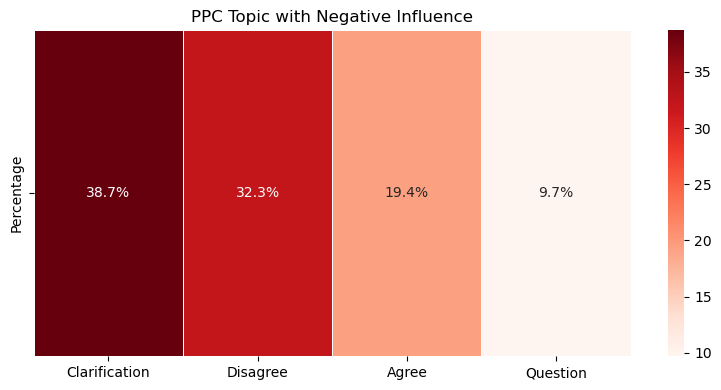

In [34]:
#==========================================================================================================
# Visualise the proportion of PPCs topic which has influence indicator is negative
#==========================================================================================================
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Filter data where Influence = 0
filtered_df = ppc_analysing_encode_df[ppc_analysing_encode_df['Influence'] == 0]

# Step 2: Count occurrences of PPC_TYPE
ppc_type_counts = filtered_df['PPC_TYPE'].value_counts()

# Step 3: Calculate percentage of each PPC_TYPE
ppc_type_percentages = (ppc_type_counts / ppc_type_counts.sum()) * 100

# Step 4: Convert to DataFrame to be used in heatmap
ppc_type_df = pd.DataFrame(ppc_type_percentages).reset_index()
ppc_type_df.columns = ['PPC_TYPE', 'Percentage']  # Rename columns for clarity

# Step 5: Create a heatmap chart showing percentages
plt.figure(figsize=(8,4))

# Custom annotations with percentage sign
annotations = np.array([f'{val:.1f}%' for val in ppc_type_df['Percentage']]).reshape(1, -1)

# Use seaborn heatmap with 'Blues' color map
sns.heatmap(ppc_type_df[['Percentage']].T, annot=annotations, fmt='', cmap='Reds', linewidths=0.5, cbar=True, xticklabels=ppc_type_df['PPC_TYPE'])

# Add title
plt.title('PPC Topic with Negative Influence')

# Show the plot
plt.tight_layout()
plt.show()


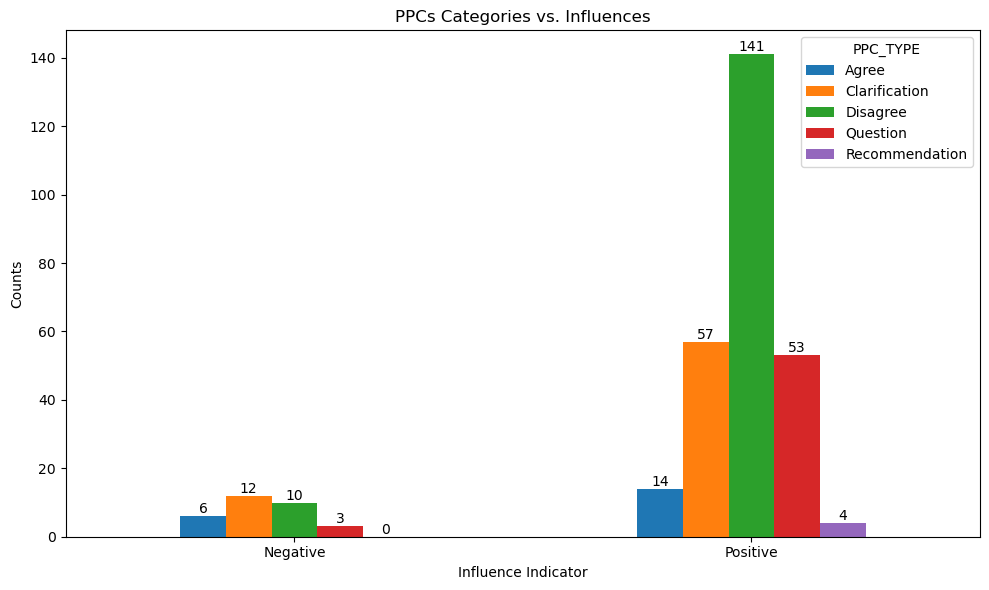

In [35]:
#==========================================================================================================
# Visualize the dataset with both positive and negative influence across PPC types
#==========================================================================================================
# Step 1: Group by 'Influence' and 'PPC_TYPE', then count occurrences
grouped_df = ppc_analysing_encode_df.groupby(['Influence', 'PPC_TYPE']).size().unstack(fill_value=0)

# Step 2: Plot a grouped bar chart
ax = grouped_df.plot(kind='bar', figsize=(10,6))

# Adding labels on top of each bar
for container in ax.containers:
    ax.bar_label(container)

# Step 3: Customize x-axis labels to 'Negative' for 0 and 'Positive' for 1
ax.set_xticklabels(['Negative', 'Positive'])

# Adding titles and labels
plt.title('PPCs Categories vs. Influences')
plt.xlabel('Influence Indicator')
plt.ylabel('Counts')
plt.xticks(rotation=0)  # Ensure the x-axis labels are readable

# Show the plot
plt.tight_layout()
plt.show()

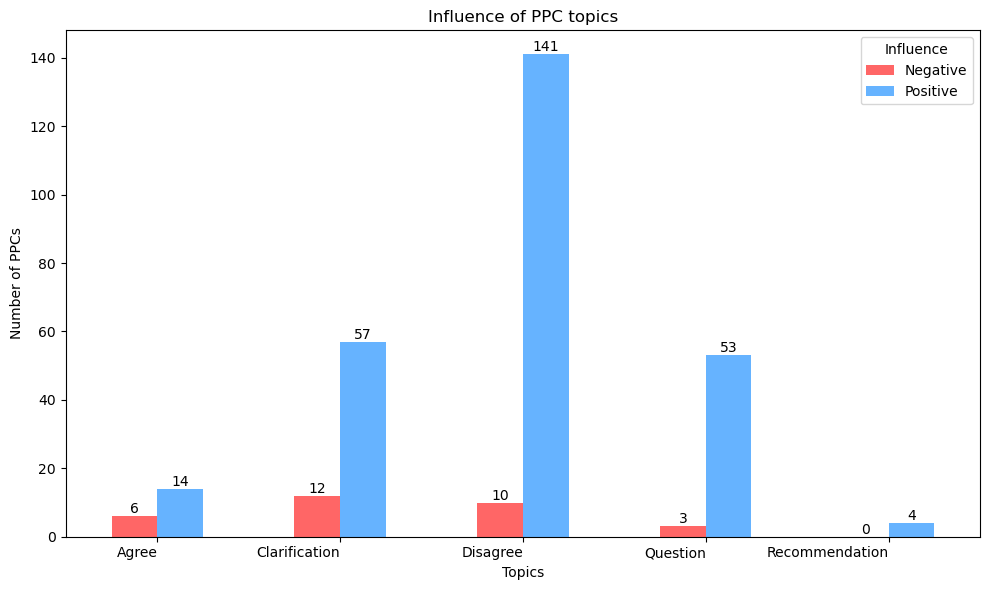

In [36]:
#==========================================================================================================
# Visualise the grouping data by PPC types
#==========================================================================================================
import matplotlib.pyplot as plt

# Step 1: Group by 'PPC_TYPE' and 'Influence', then count occurrences
grouped_df = ppc_analysing_encode_df.groupby(['PPC_TYPE', 'Influence']).size().unstack(fill_value=0)

# Step 2: Plot a grouped bar chart with PPC Type on the x-axis and Positive/Negative as bars
ax = grouped_df.plot(kind='bar', figsize=(10,6), color=['#ff6666', '#66b3ff'], width=0.5)

# Adding labels on top of each bar
for container in ax.containers:
    ax.bar_label(container)

# Step 3: Customize x-axis labels to display the PPC Types
ax.set_xticklabels(grouped_df.index, rotation=0, ha='right')  # Rotate for better readability

# Adding titles and labels
plt.title('Influence of PPC topics')
plt.xlabel('Topics')
plt.ylabel('Number of PPCs')

# Add legend for the bars
plt.legend(['Negative', 'Positive'], title="Influence")

# Ensure the layout is tight and well spaced
plt.tight_layout()

# Show the plot
plt.show()
